### sklearn.linear_model.Ridge
* _class_ sklearn.linear_model.Ridge(_alpha=1.0_, _*_, _fit_intercept=True_, _copy_X=True_, _max_iter=None_, _tol=0.0001_, _solver='auto'_, _positive=False_, _random_state=None_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/7db5b6a98/sklearn/linear_model/_ridge.py#L921)[¶](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge "Permalink to this definition")

** Linear least squares with l2 regularization.

Minimizes the objective function:

||y - Xw||^2_2 + alpha * ||w||^2_2

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape (n_samples, n_targets)).

Read more in the  [User Guide](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression).

In [6]:
# 앞의 LinearRegression예제에서 분할한 feature 데이터 셋인 X_data과 Target 데이터 셋인 Y_target 데이터셋을 그대로 이용 
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import matplotlib.pylab as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd

# boston 데이타셋 로드
boston = pd.read_csv('./datasets/Boston.csv')

y_target = boston['medv']
X_data = boston.drop(['medv'],axis=1,inplace=False)

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))




 5 folds 의 개별 Negative MSE scores:  [-14.604 -24.249 -28.83  -74.663 -27.7  ]
 5 folds 의 개별 RMSE scores :  [3.821 4.924 5.369 8.641 5.263]
 5 folds 의 평균 RMSE : 5.604 


In [36]:
from sklearn.linear_model import LinearRegression

y_target = boston['medv']
X_data = boston.drop(['medv'],axis=1,inplace=False)

lr = LinearRegression()
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-14.753 -25.072 -32.737 -80.584 -32.162]
 5 folds 의 개별 RMSE scores :  [3.841 5.007 5.722 8.977 5.671]
 5 folds 의 평균 RMSE : 5.844 


In [7]:
import seaborn as sns
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1 , 10 , 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.844 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.807 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.693 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.604 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.500 


alpha 값이 증가할 수록 RMSE가 낮아진다 -> 성능이 좋아지고 있다.

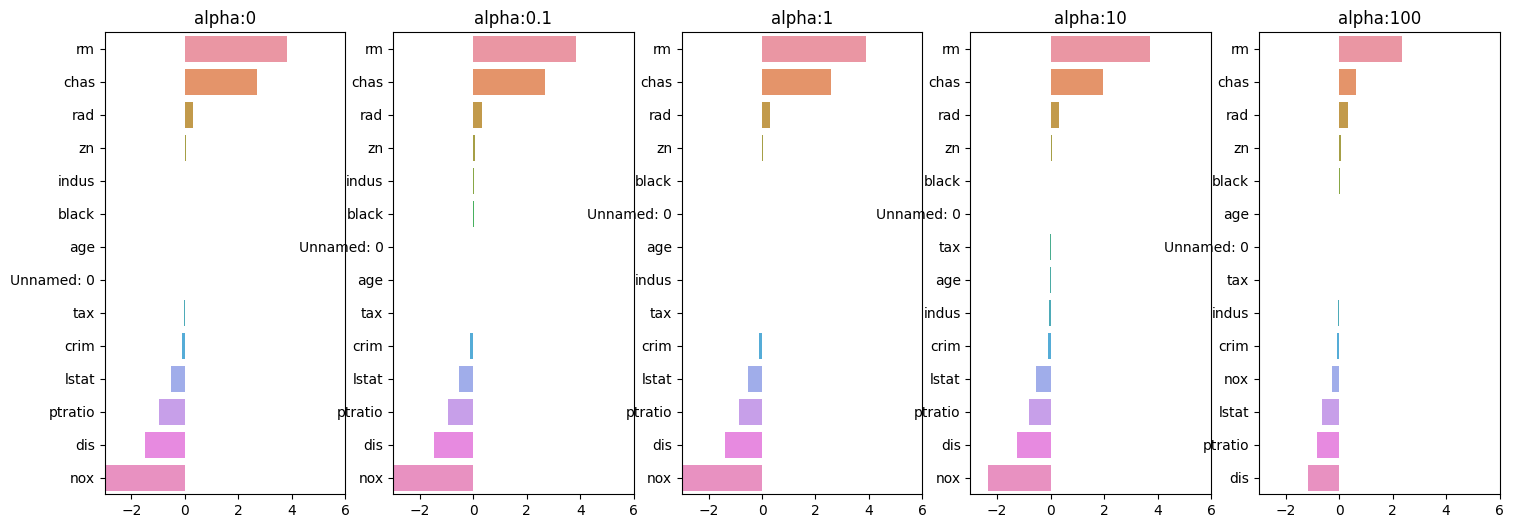

In [8]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [9]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
rm,3.839225,3.847742,3.884133,3.730589,2.348374
chas,2.705245,2.688771,2.572215,1.968828,0.642700
rad,0.324925,0.322626,0.310511,0.301086,0.332157
zn,0.048031,0.048197,0.049148,0.051333,0.055823
indus,0.019932,0.015425,-0.009068,-0.042707,-0.052455
black,0.009357,0.009413,0.009716,0.010075,0.009416
age,-0.001938,-0.002915,-0.008131,-0.013394,-0.000734
Unnamed: 0,-0.002526,-0.002553,-0.002694,-0.002796,-0.002172
tax,-0.011598,-0.011675,-0.012119,-0.013164,-0.015208
crim,-0.108762,-0.108240,-0.105445,-0.102379,-0.102900


alpha 값이 증가할 수록 nox 값이 감소 / 다른 회귀계수 값과 비슷해졌다. 기존 회귀 모델의 성능이 좋아졌다.

### sklearn.linear_model.Lasso
* _class_ sklearn.linear_model.Lasso(_alpha=1.0_, _*_, _fit_intercept=True_, _precompute=False_, _copy_X=True_, _max_iter=1000_, _tol=0.0001_, _warm_start=False_, _positive=False_, _random_state=None_, _selection='cyclic'_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/7db5b6a98/sklearn/linear_model/_coordinate_descent.py#L1081)[¶](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso "Permalink to this definition")

** Linear Model trained with L1 prior as regularizer (aka the Lasso).

The optimization objective for Lasso is:

(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

Technically the Lasso model is optimizing the same objective function as the Elastic Net with  `l1_ratio=1.0`  (no L2 penalty).

Read more in the  [User Guide](https://scikit-learn.org/stable/modules/linear_model.html#lasso).

In [10]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data , y_target)
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
        coeff = pd.Series(data=model.coef_ , index=X_data.columns )
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df
# end of get_linear_regre_eval

In [11]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n = X_data, y_target_n = y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.714 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.731 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.868 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.082 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.783 


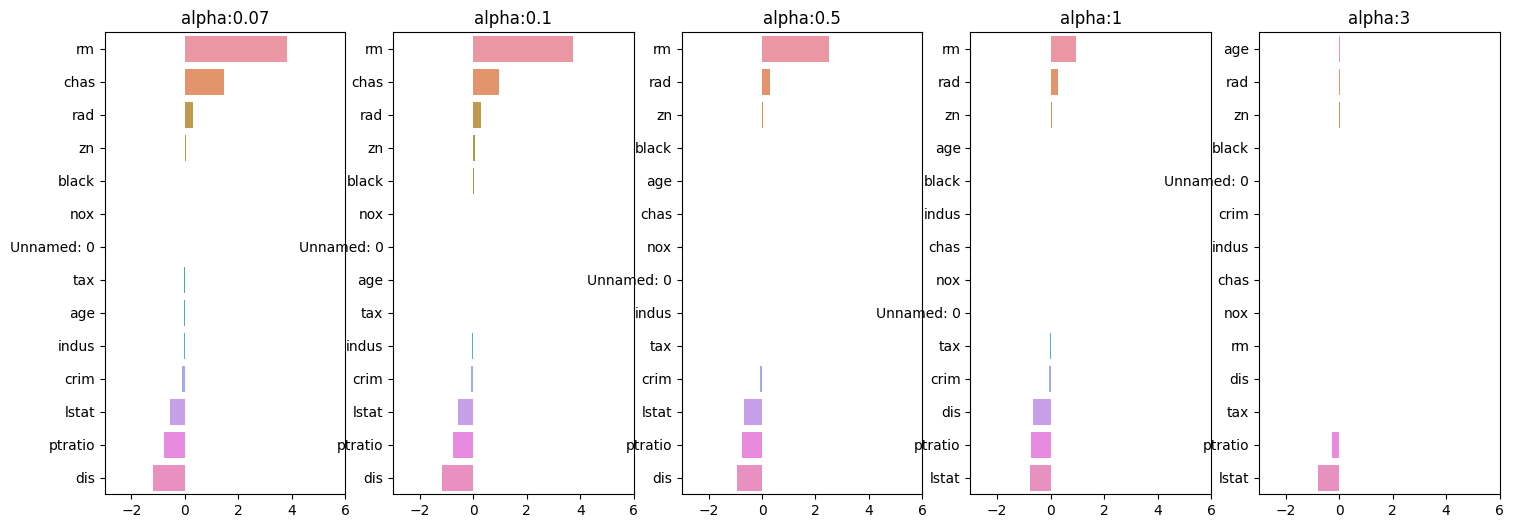

In [29]:
### Lidge와 똑같은 그래프를 라쏘 회귀분석으로 실행 / 알파값이 증가할 수록 실제로 회귀 계수 값이 작아지는지 관측
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(lasso_alphas) :
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=lasso.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

alpha가 0.07일때 평균 RMSE 값이 가장 낮다 -> 가장 성능이 좋다

In [12]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
rm,3.818942,3.731253,2.514752,0.951835,0.000000
chas,1.456124,0.976090,0.000000,0.000000,0.000000
rad,0.292072,0.295033,0.289568,0.266066,0.043498
zn,0.050777,0.050862,0.050519,0.049306,0.036391
black,0.010285,0.010284,0.009491,0.008250,0.006497
nox,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
Unnamed: 0,-0.002738,-0.002631,-0.001545,-0.000216,0.002388
tax,-0.013477,-0.013789,-0.014993,-0.015155,-0.009370
age,-0.014332,-0.012560,0.002135,0.020707,0.043925
indus,-0.041745,-0.036255,-0.004927,-0.000000,-0.000000


### sklearn.linear_model.ElasticNet
* _class_ sklearn.linear_model.ElasticNet(_alpha=1.0_, _*_, _l1_ratio=0.5_, _fit_intercept=True_, _precompute=False_, _max_iter=1000_, _copy_X=True_, _tol=0.0001_, _warm_start=False_, _positive=False_, _random_state=None_, _selection='cyclic'_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/7db5b6a98/sklearn/linear_model/_coordinate_descent.py#L663)[¶](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet "Permalink to this definition")

** Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function:

1 / (2 * n_samples) * ||y - Xw||^2_2
+ alpha * l1_ratio * ||w||_1
+ 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

If you are interested in controlling the L1 and L2 penalty separately, keep in mind that this is equivalent to:

a * ||w||_1 + 0.5 * b * ||w||_2^2

where:

alpha = a + b and l1_ratio = a / (a + b)

The parameter l1_ratio corresponds to alpha in the glmnet R package while alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio = 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable, unless you supply your own sequence of alpha.

Read more in the  [User Guide](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net).

In [27]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.647 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.645 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.682 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.902 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.607 


In [14]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
rm,3.601129,3.438970,1.928772,0.941199,0.000000
chas,1.346550,0.993541,0.000000,0.000000,0.000000
rad,0.299580,0.303398,0.312441,0.293131,0.133409
zn,0.051794,0.052230,0.053800,0.052423,0.037272
black,0.010158,0.010100,0.009132,0.008325,0.007012
Unnamed: 0,-0.002684,-0.002573,-0.001486,-0.000479,0.001819
age,-0.012691,-0.010708,0.006419,0.019934,0.044864
tax,-0.013729,-0.014053,-0.015613,-0.016078,-0.012004
indus,-0.044587,-0.042322,-0.022934,-0.000000,-0.000000
crim,-0.100386,-0.100111,-0.089590,-0.073759,-0.018629


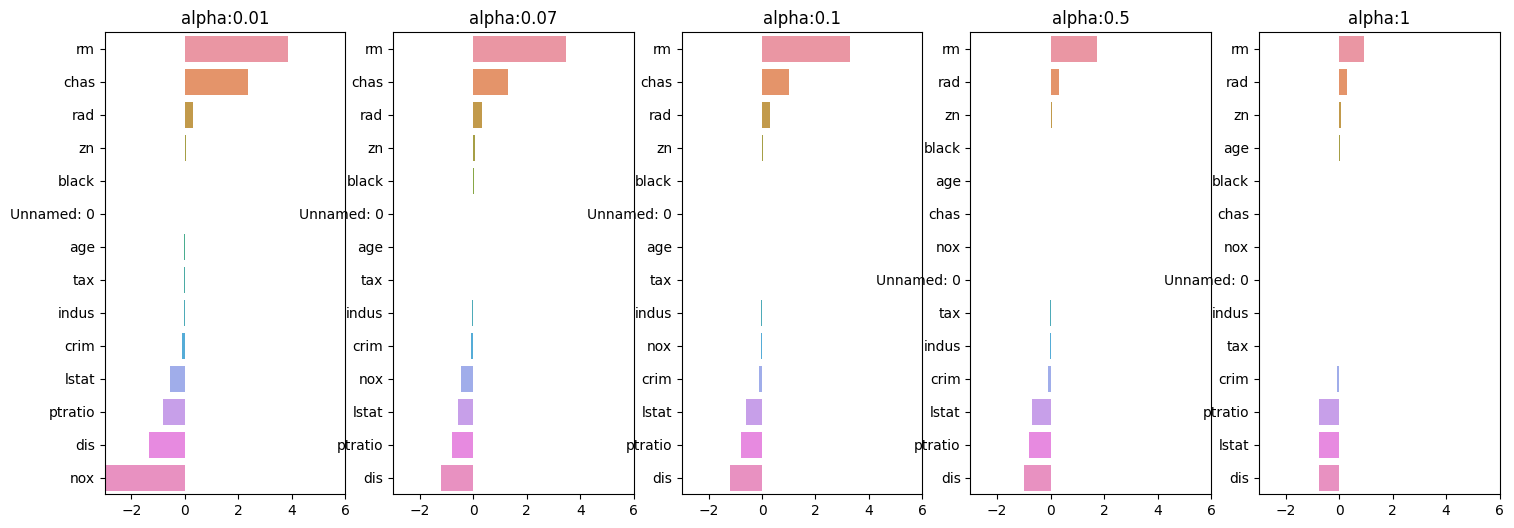

In [28]:
### Lidge와 라쏘 회귀분석으로 실행한 그래프를 엘라스틱넷으로 실행 / 알파값이 증가할 수록 실제로 회귀 계수 값이 작아지는지 관측
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()
elastic_alphas = [0.01, 0.07, 0.1, 0.5, 1]

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(elastic_alphas) :
    elastic = ElasticNet(alpha = alpha)
    elastic.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=elastic.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

**릿지와 라쏘에서는 다중 공선성 문제를 먼저 체크하고 실행해야 한다. 

**1. 다중 공선성 체크 2. 라쏘 실행 (feature selection에 더 유리) 3. 비즈니스 모델 채택

In [33]:
boston.drop(['Unnamed: 0'], axis=1).corr(method='pearson')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
